In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/trainx.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


<Axes: xlabel='GarageQual'>

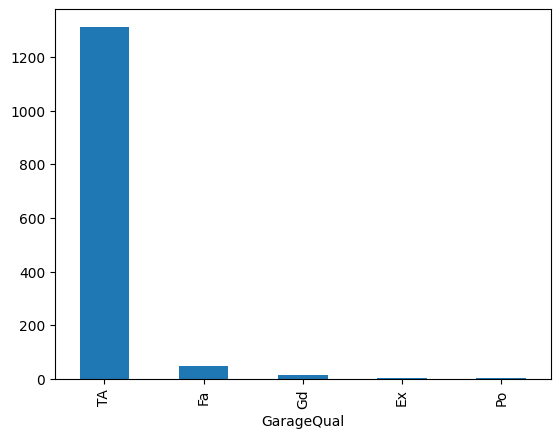

In [6]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()

In [9]:
df['GarageQual'].fillna('Missing', inplace=True)

<Axes: xlabel='GarageQual'>

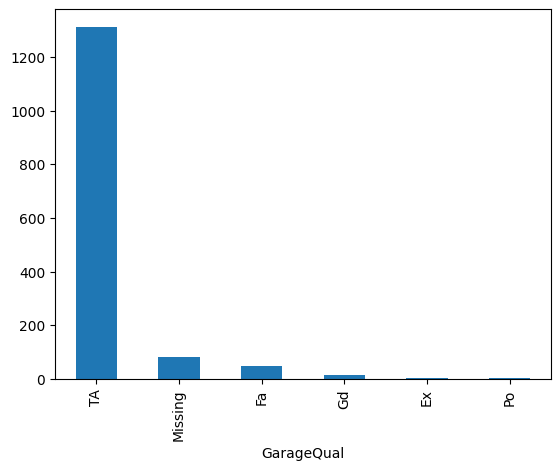

In [10]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()

In [12]:
df['FireplaceQu'].fillna('Missing', inplace=True)

<Axes: xlabel='FireplaceQu'>

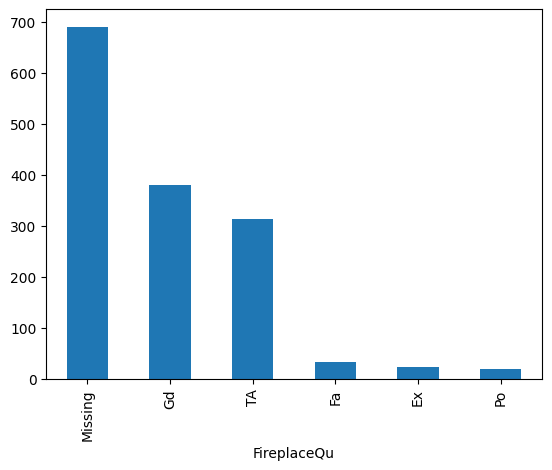

In [13]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2, random_state=42)

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imputer = SimpleImputer(strategy='constant', fill_value='Missing')

In [17]:
from sklearn.compose import ColumnTransformer

In [18]:
trf = ColumnTransformer([
    ('imputer', imputer, ['GarageQual', 'FireplaceQu'])
])

In [19]:
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [22]:
trf.named_transformers_['imputer'].statistics_

array(['Missing', 'Missing'], dtype=object)